<a href="https://colab.research.google.com/github/richa-basak/MSSM-CMU/blob/main/cellxgene_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list | grep cupy

cupy-cuda12x                       12.2.0


In [2]:
!pip uninstall cupy-cuda12x
!pip install scanpy

Found existing installation: cupy-cuda12x 12.2.0
Uninstalling cupy-cuda12x-12.2.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cupy/*
    /usr/local/lib/python3.10/dist-packages/cupy_backends/*
    /usr/local/lib/python3.10/dist-packages/cupy_cuda12x-12.2.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/cupyx/*
Proceed (Y/n)? y
  Successfully uninstalled cupy-cuda12x-12.2.0
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=802

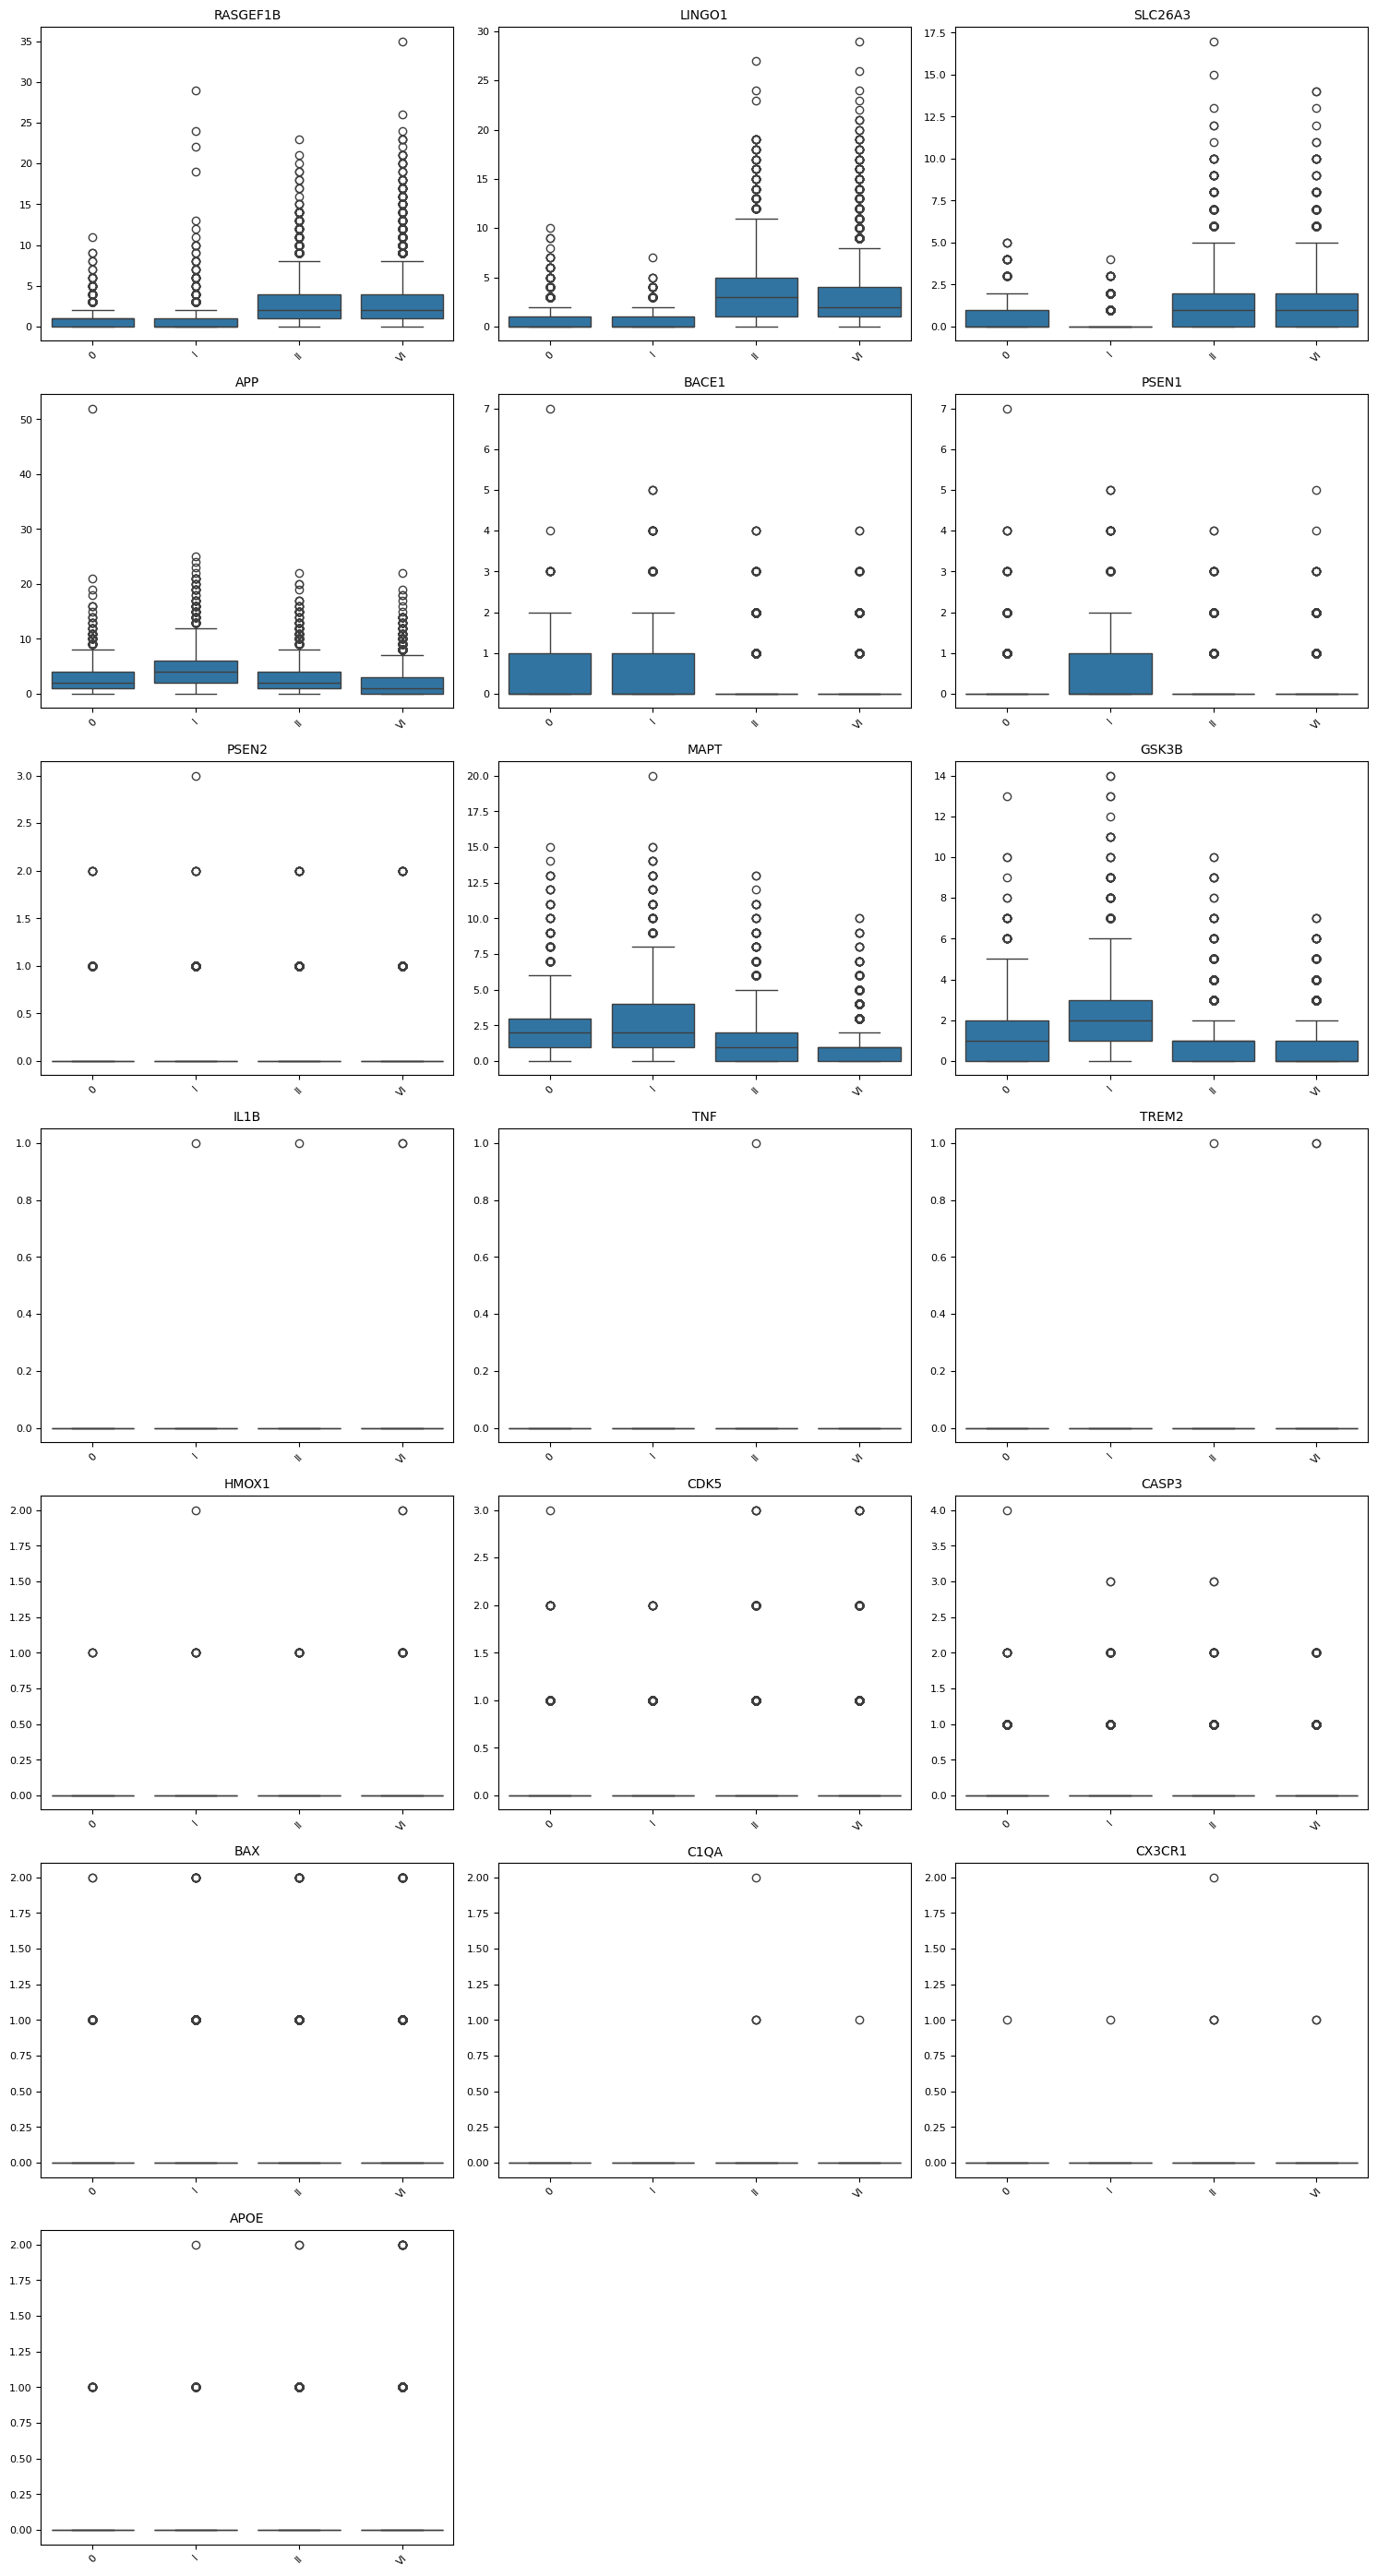

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urllib.request
import scanpy as sc
import os
import math

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Step 1: Define the specific genes of interest
genes_of_interest = [
    "RASGEF1B", "LINGO1", "SLC26A3", "APP", "BACE1", "PSEN1", "PSEN2",
    "MAPT", "GSK3B", "IL1B", "TNF", "TREM2", "NOX2", "HMOX1", "CDK5",
    "DREAM", "CASP3", "BAX", "C1QA", "CX3CR1", "APOE"
]

# Step 2: Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Step 3: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Step 4: Extract gene expression for the matched genes and Braak stages
expression_data = {}
for gene in matched_genes.keys():
    ensembl_id = matched_genes[gene]
    expression_data[gene] = adata.raw[:, ensembl_id].X.toarray().flatten()

# Step 5: Get Braak stage information from ⁠adata.obs['Braak']⁠
braak_stages = adata.obs['Braak']

# Step 6: Prepare data for plotting
plot_data = pd.DataFrame({
    'Braak_stage': braak_stages,
    **{gene: expression_data[gene] for gene in matched_genes.keys()}
})

# Step 7: Visualize gene expression across Braak stages using a compact boxplot layout
num_genes = len(matched_genes)
cols = 3  # 3 plots per row
rows = math.ceil(num_genes / cols)

plt.figure(figsize=(15, rows * 4))  # Smaller overall figure height for compactness
for idx, gene in enumerate(matched_genes.keys(), start=1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(data=plot_data, x='Braak_stage', y=gene)
    plt.title(f'{gene}', fontsize=10)  # Smaller title font
    plt.xlabel('')
    plt.ylabel('')  # Remove axis labels for compactness
    plt.xticks(rotation=45, fontsize=8)  # Smaller x-ticks for compactness
    plt.yticks(fontsize=8)

plt.tight_layout(pad=1)  # Reduce padding
plt.show()
